In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [9]:
raw_data=pd.read_csv("1.04.+Real-life+example (1).csv")
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [12]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [14]:
#there are 312 unique values for the model.so creating a 312 dummy bariable is not taken into consideration now.so we will drop that coluumn
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')



,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [16]:
#for brand,body,mileage,engine type,registartion and year have all data.no missing vakues as the number of observation in equal to the count.But the other two they have missing values.so we have to deal with it

data.isnull().sum() #to find the numbe rof missing values


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [19]:
#there are 172 missing values in price and 150 missing values in enginevolume.

#if the %of missing values is less than 5 then we can drop all the missing values columns as per the experienced data analysts

data_no_mv=data.dropna(axis=0) #drops the raws with nukll data
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\2166419464.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

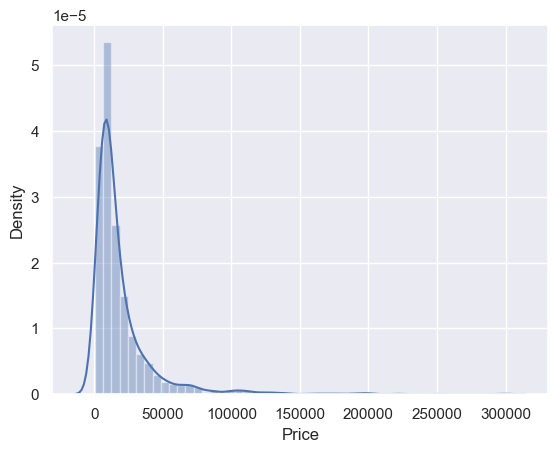

In [24]:
#now observe the min,max,mean of all the columns.Just by seeing we can observe that mean of price column is somewhat closer to the min.which basicaly cannot be a normal distribution
#lets confirm this by plotting the graph

sns.distplot(data_no_mv['Price'])


In [25]:
#from above graph it is clear that this is not a normal distribution.This will be a problem for the regression model
#from describtion it is clear that around 75% of price is around 21k dollars but still that max in 300k.That is there are some outliers in.From the graph is also it is visible
#one of the method is to remove the top 1 % of the observations

q=data_no_mv['Price'].quantile(0.99) #this quantile function will only use the first 99% of the observaion.rest of the data will be exluded.q is a value
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

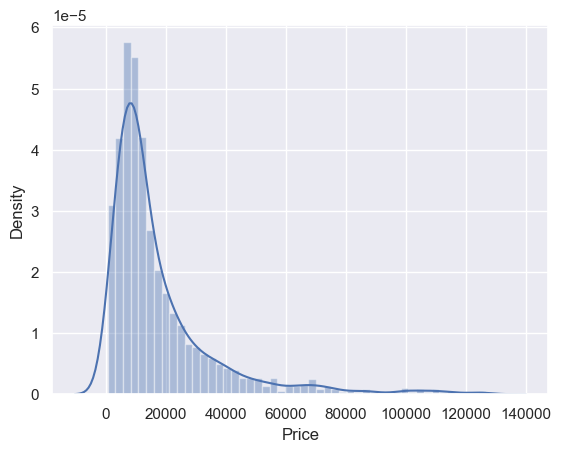

In [26]:
sns.distplot(data_1['Price'])

In [27]:
#now the otuliers are removed ans the max is better than closer to mean even though it isnt that much.nut we did out best by sacrificing the 1% of our data
#check for the oytliers in other columns also

data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

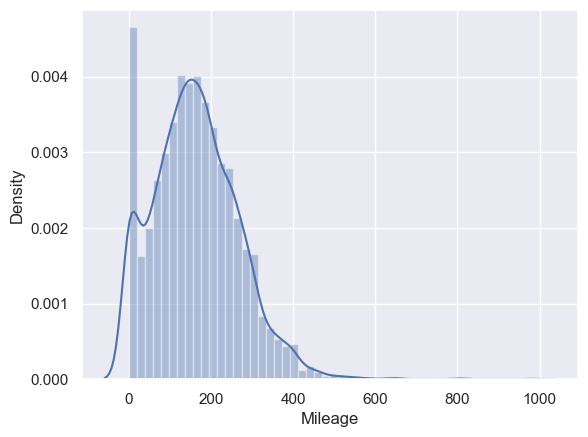

In [29]:
sns.distplot(data_no_mv['Mileage'])

In [31]:
#here also ther are some outliers we can see which can be reworked too make the graph more resembling to normal distribution.
q=data_no_mv['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1510,NaN,NaN,1825,3575,NaN
mean,NaN,17936.780614,NaN,161.414659,2.747497,NaN,NaN,2006.393102
std,NaN,19009.750360,NaN,95.940408,4.981033,NaN,NaN,6.593870
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21417.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

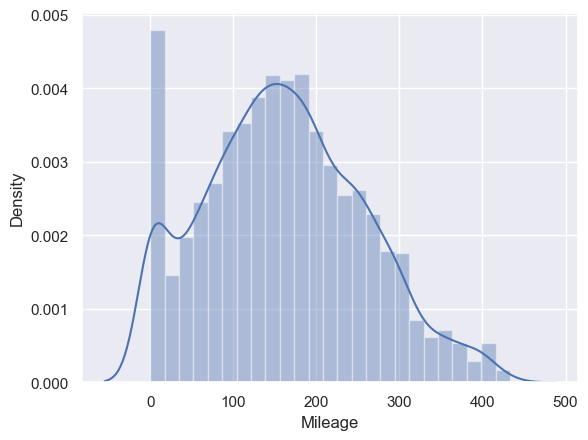

In [32]:
sns.distplot(data_2['Mileage'])

#now it will show the grpah that is mpre closer the normal distribution

In [36]:
#Normally the engine volume of cars are upto 6.5.But by observing the vlues of enginevolume there are enginve voluumes that are greater 6.5 which is impossible,so we remove that

data_3=data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3920,3920.000000,3920,3920.000000,3920.000000,3920,3920,3920.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1498,NaN,NaN,1818,3558,NaN
mean,NaN,17991.352031,NaN,161.209949,2.443304,NaN,NaN,2006.409184
std,NaN,19043.203478,NaN,95.980959,0.946242,NaN,NaN,6.593734
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

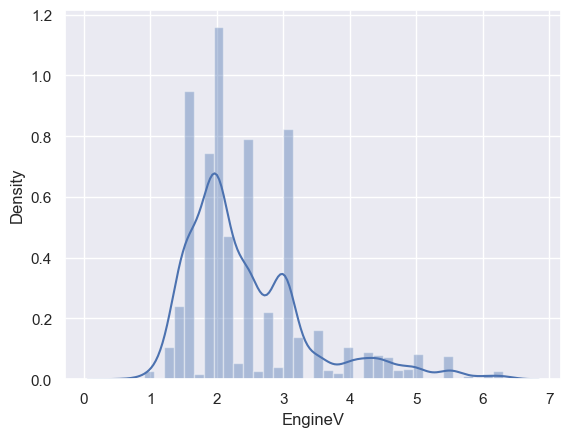

In [37]:
sns.distplot(data_3['EngineV']) #the graph is almost resembles the normal distribution

C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\1106668726.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

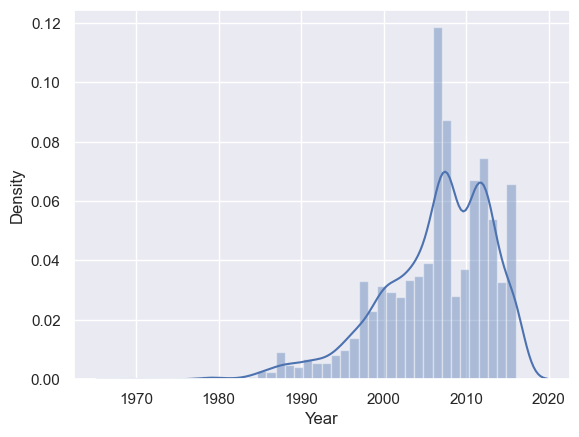

In [38]:
#noe lets deal with the year
sns.distplot(data_no_mv['Year'])

C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_16964\3053661623.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

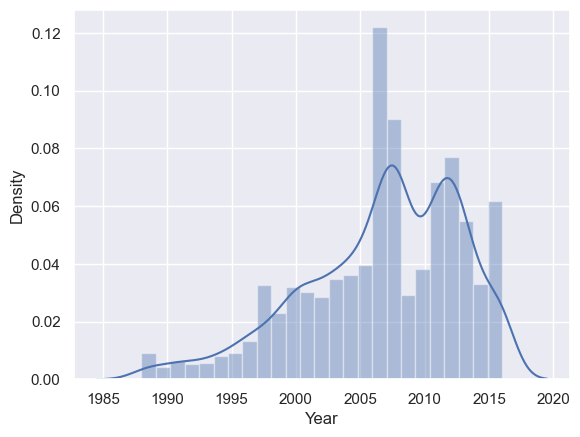

In [40]:
#here the outliers are in front end.so we want to delete the first 1%

q=data_no_mv['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q] 
sns.distplot(data_4['Year'])

In [43]:
#now all the cleaning si done
data_cleaned=data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [44]:
#now the data cleaning is done

In [45]:
#now we are gonna deal with ols assumptions to check the valiidity or reliability of regression results

Text(0.5, 1.0, 'Price vs Title')

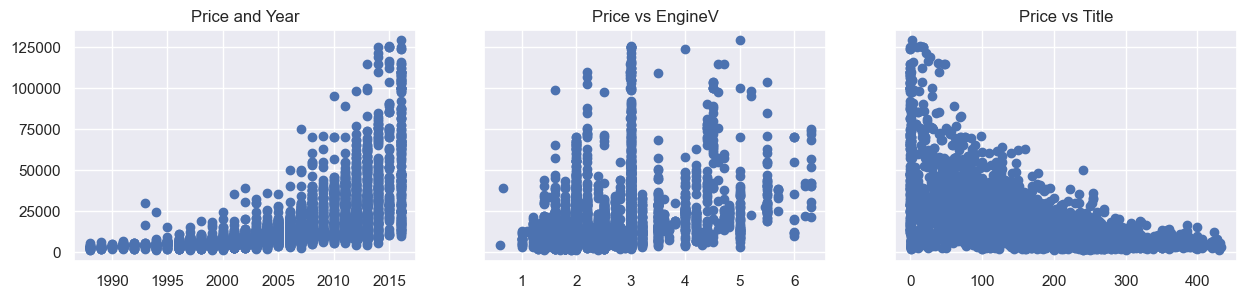

In [47]:
f, (ax1,ax2,ax3) = plt.subplots(1,3 , sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price vs EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price vs Title')

In [48]:
#these functions are not linearly distributed.so turn them into linear
#we use log transforamtion to do this.especially when the grphs are exponentila one log trnafromtion works perfectly
#here we log tranform the price

log_price= np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140,9.415868
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235,0.876669
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


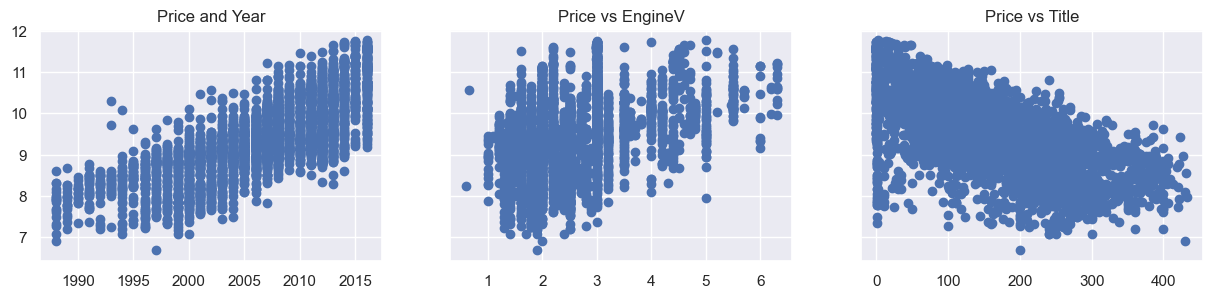

In [51]:
#now we plot again after the log trnafromation with y axis as the log_price

f, (ax1,ax2,ax3) = plt.subplots(1,3 , sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price vs EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price vs Title')

plt.show()

In [53]:
#now we can see a linear pattern in all the graphs

#now we drop the original price data since it is no longer needed

data_cleaned= data_cleaned.drop(['Price'],axis=1)

In [54]:
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3866,3866,3866.000000,3866.000000,3866,3866,3866.000000,3866.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1466,NaN,NaN,1807,3504,NaN,NaN
mean,NaN,NaN,160.471547,2.450246,NaN,NaN,2006.713140,9.415868
std,NaN,NaN,95.543697,0.949413,NaN,NaN,6.101235,0.876669
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [56]:

#all other assumption excpet the multicollinearity is assumed to be dealt with
#so next OLS assumption to be dealed with is mulitcolniearity

#by observiing itself we can say that a mulitcollinearrity exist between mileage and year as year incrses mileage decreases
#to check whethere ther is mulitcollinearity between them we use VIF(variance inflation factor)

#VIF=1:no multicollinearity
#1<VIF<5:perfectly okay
#VIF>10:unaccptable

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV
